In [1]:
%config InlineBackend.figure_formats = ['svg']
import quimb.tensor as qtn
import quimb as qu
import cotengra as ctg
import autoray as ar
import register_ as reg
import algo_cooling as algo
import quf
import time
import numpy as np
from quimb.tensor.belief_propagation.l2bp import L2BP
import matplotlib.pyplot as plt


In [2]:
# plt.figure(figsize=(8, 5))  # compact and clean figure


# chi = 4
# f_peps_4 = qu.load_from_disk(f"store/Error_l_peps{chi}")
# chi = 8
# f_peps_8 = qu.load_from_disk(f"store/Error_l_peps{chi}")
# chi = 12
# f_peps_12 = qu.load_from_disk(f"store/Error_l_peps{chi}")


# chi = 4
# f_pepo_4 = qu.load_from_disk(f"store/Error_l_pepo{chi}")
# chi = 8
# f_pepo_8 = qu.load_from_disk(f"store/Error_l_pepo{chi}")
# chi = 12
# f_pepo_12 = qu.load_from_disk(f"store/Error_l_pepobp{chi}")


# t_l = qu.load_from_disk(f"store/t_l")


# plt.plot(
#     t_l, f_peps_4, zorder=5, label=r"peps, $\chi=4$",
#     markersize=10, linewidth=2.7, alpha=1., marker='>', linestyle='-',
#     markeredgecolor="whitesmoke", mfc="orchid", markeredgewidth=1.4
# )

# plt.plot(
#     t_l, f_peps_8, zorder=5, label=r"peps, $\chi=8$",
#     markersize=10, linewidth=2.7, alpha=1., marker='>', linestyle='-',
#     markeredgecolor="whitesmoke", mfc="orange", markeredgewidth=1.4
# )

# plt.plot(
#     t_l, f_peps_12, zorder=5, label=r"peps, $\chi=12$",
#     markersize=10, linewidth=2.7, alpha=1., marker='>', linestyle='-',
#     markeredgecolor="whitesmoke", mfc="darkred", markeredgewidth=1.4
# )


# plt.plot(
#     t_l, f_pepo_4, zorder=5, label=r"pepo, $\chi=4$",
#     markersize=13, linewidth=2.7, alpha=1., marker='*', linestyle='-',
#     markeredgecolor="whitesmoke", mfc="darkred", markeredgewidth=1.4
# )

# plt.plot(
#     t_l, f_pepo_8, zorder=5, label=r"pepo, $\chi=8$",
#     markersize=13, linewidth=2.7, alpha=1., marker='*', linestyle='-',
#     markeredgecolor="whitesmoke", mfc="indigo", markeredgewidth=1.4
# )

# plt.plot(
#     t_l, f_pepo_12, zorder=5, label=r"pepo*, $\chi=12$",
#     markersize=13, linewidth=2.7, alpha=1., marker='*', linestyle='-',
#     markeredgecolor="whitesmoke", mfc="darkgreen", markeredgewidth=1.4
# )


# plt.yscale('log')

# # Set axis limits
# plt.xlim(0, max(t_l))        # adjust x-axis range if needed
# # plt.ylim(1e-1, 1.2)            # adjust y-axis range for log scale

# plt.ylabel(rf"In-Fidelity $ \langle \psi \mid \phi \rangle | $", fontsize=12)
# plt.xlabel("Time", fontsize=12)

# plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.5)
# plt.tick_params(width=0.8, labelsize=12)
# for spine in plt.gca().spines.values():
#     spine.set_linewidth(1.)


# plt.title(rf"Ising Model, $J=1, h=3.05$, $L = {4} \times {4}$, $\delta={0.05}$", fontsize=14, color='darkred', pad=15)  # pad adds space above the plot

# plt.grid(color='gray', linestyle='-', linewidth=1., alpha=1.)
# plt.legend(loc='best', frameon=True, shadow=True, fontsize=14)
# plt.tight_layout()
# plt.show()


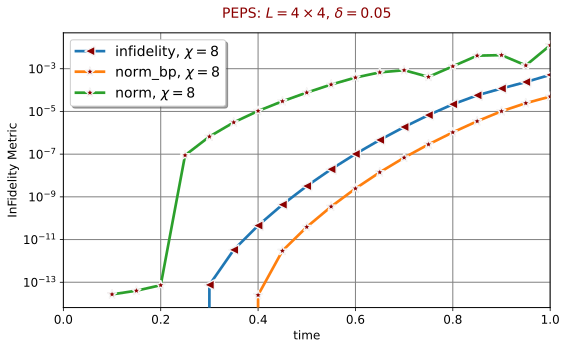

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # compact and clean figure

chi = 8
f_peps_8 = qu.load_from_disk(f"store/Error_l_peps{chi}")
f_pepsbp_8 = qu.load_from_disk(f"store/Error_l_pepsbp{chi}")
norm_8 = qu.load_from_disk(f"store/Error_norm_peps{chi}")



t_l = qu.load_from_disk(f"store/t_l")



plt.plot(
    t_l, f_peps_8, zorder=5, label=r"infidelity, $\chi=8$",
    markersize=10, linewidth=2.7, alpha=1., marker='<', linestyle='-',
    markeredgecolor="whitesmoke", mfc="darkred", markeredgewidth=1.4
)

plt.plot(
    t_l, f_pepsbp_8, zorder=5, label=r"norm_bp, $\chi=8$",
    markersize=10, linewidth=2.7, alpha=1., marker='*', linestyle='-',
    markeredgecolor="whitesmoke", mfc="darkred", markeredgewidth=1.4
)

plt.plot(
    t_l, norm_8, zorder=5, label=r"norm, $\chi=8$",
    markersize=10, linewidth=2.7, alpha=1., marker='*', linestyle='-',
    markeredgecolor="whitesmoke", mfc="darkred", markeredgewidth=1.4
)




plt.yscale('log')

# Set axis limits
plt.xlim(0, max(t_l))        # adjust x-axis range if needed
# plt.ylim(1e-1, 1.2)            # adjust y-axis range for log scale

plt.ylabel("InFidelity Metric", fontsize=12)
plt.xlabel("time", fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.5)
plt.tick_params(width=0.8, labelsize=12)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.)


plt.title(rf"PEPS: $L = {4} \times {4}$, $\delta={0.05}$", fontsize=14, color='darkred', pad=15)  # pad adds space above the plot

plt.grid(color='gray', linestyle='-', linewidth=1., alpha=1.)
plt.legend(loc='best', frameon=True, shadow=True, fontsize=14)
plt.tight_layout()
plt.show()


In [4]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 5))  # compact and clean figure


# chi = 8
# f_peps_8 = qu.load_from_disk(f"store/Error_l_pepo{chi}")
# f_pepsbp_8 = qu.load_from_disk(f"store/Error_l_pepobp{chi}")
# norm_8 = qu.load_from_disk(f"store/Error_norm_pepo{chi}")



# t_l = qu.load_from_disk(f"store/t_l")



# plt.plot(
#     t_l, f_peps_8, zorder=5, label=r"infidelity, $\chi=8$",
#     markersize=10, linewidth=2.7, alpha=1., marker='<', linestyle='-',
#     markeredgecolor="whitesmoke", mfc="darkred", markeredgewidth=1.4
# )

# plt.plot(
#     t_l, f_pepsbp_8, zorder=5, label=r"norm_bp, $\chi=8$",
#     markersize=10, linewidth=2.7, alpha=1., marker='*', linestyle='-',
#     markeredgecolor="whitesmoke", mfc="darkred", markeredgewidth=1.4
# )

# plt.plot(
#     t_l, norm_8, zorder=5, label=r"norm, $\chi=8$",
#     markersize=10, linewidth=2.7, alpha=1., marker='*', linestyle='-',
#     markeredgecolor="whitesmoke", mfc="darkred", markeredgewidth=1.4
# )




# plt.yscale('log')

# # Set axis limits
# plt.xlim(0, max(t_l))        # adjust x-axis range if needed
# # plt.ylim(1e-1, 1.2)            # adjust y-axis range for log scale

# plt.ylabel("InFidelity Metric", fontsize=12)
# plt.xlabel("time", fontsize=12)

# plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.5)
# plt.tick_params(width=0.8, labelsize=12)
# for spine in plt.gca().spines.values():
#     spine.set_linewidth(1.)


# plt.title(rf"PEPO: $L = {4} \times {4}$, $\delta={0.05}$", fontsize=14, color='darkred', pad=15)  # pad adds space above the plot

# plt.grid(color='gray', linestyle='-', linewidth=1., alpha=1.)
# plt.legend(loc='best', frameon=True, shadow=True, fontsize=14)
# plt.tight_layout()
# plt.show()


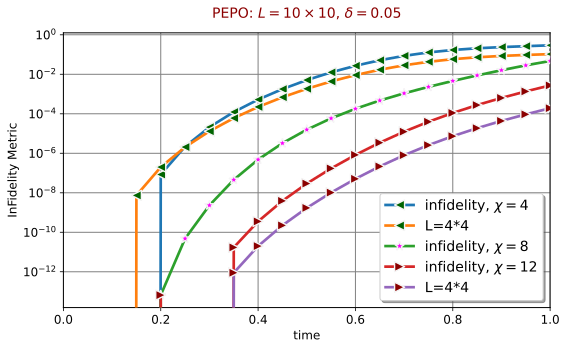

In [5]:
plt.figure(figsize=(8, 5))  # compact and clean figure


chi = 8
norm_8 = qu.load_from_disk(f"store/Error_normbp_pepo_{chi}_L{100}")
chi = 4
norm_4 = qu.load_from_disk(f"store/Error_normbp_pepo_{chi}_L{100}")
chi = 12
norm_12 = qu.load_from_disk(f"store/Error_normbp_pepo_{chi}_L{100}")


chi = 4
f_pepo_4 = qu.load_from_disk(f"store/Error_l_pepo{chi}")
chi = 8
f_pepo_8 = qu.load_from_disk(f"store/Error_l_pepo{chi}")
chi = 12
f_pepo_12 = qu.load_from_disk(f"store/Error_l_pepobp{chi}")




t_l = qu.load_from_disk(f"store/t_l")


plt.plot(
    t_l, norm_4, zorder=5, label=r"infidelity, $\chi=4$",
    markersize=10, linewidth=2.7, alpha=1., marker='<', linestyle='-',
    markeredgecolor="whitesmoke", mfc="darkgreen", markeredgewidth=1.4
)
plt.plot(
    t_l, f_pepo_4, zorder=5, label=r"L=4*4",
    markersize=10, linewidth=2.7, alpha=1., marker='<', linestyle='-',
    markeredgecolor="whitesmoke", mfc="darkgreen", markeredgewidth=1.4
)


plt.plot(
    t_l, norm_8, zorder=5, label=r"infidelity, $\chi=8$",
    markersize=10, linewidth=2.7, alpha=1., marker='*', linestyle='-',
    markeredgecolor="whitesmoke", mfc="magenta", markeredgewidth=1.4
)
# plt.plot(
#     t_l, f_pepo_8, zorder=5, label=r"",
#     markersize=10, linewidth=2.7, alpha=1., marker='*', linestyle='-',
#     markeredgecolor="whitesmoke", mfc="magenta", markeredgewidth=1.4
# )


plt.plot(
    t_l, norm_12, zorder=5, label=r"infidelity, $\chi=12$",
    markersize=10, linewidth=2.7, alpha=1., marker='>', linestyle='-',
    markeredgecolor="whitesmoke", mfc="darkred", markeredgewidth=1.4
)

plt.plot(
    t_l, f_pepo_12, zorder=5, label=r"L=4*4",
    markersize=10, linewidth=2.7, alpha=1., marker='>', linestyle='-',
    markeredgecolor="whitesmoke", mfc="darkred", markeredgewidth=1.4
)


plt.yscale('log')

# Set axis limits
plt.xlim(0, max(t_l))        # adjust x-axis range if needed
# plt.ylim(1e-1, 1.2)            # adjust y-axis range for log scale

plt.ylabel("InFidelity Metric", fontsize=12)
plt.xlabel("time", fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.5)
plt.tick_params(width=0.8, labelsize=12)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.)


plt.title(rf"PEPO: $L = {10} \times {10}$, $\delta={0.05}$", fontsize=14, color='darkred', pad=15)  # pad adds space above the plot

plt.grid(color='gray', linestyle='-', linewidth=1., alpha=1.)
plt.legend(loc='best', frameon=True, shadow=True, fontsize=14)
plt.tight_layout()
plt.show()


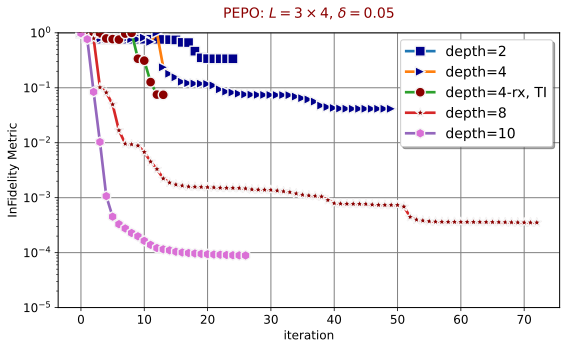

In [13]:
#qu.save_to_disk(grad_hist, f"store/grad_d{depth_total}")
plt.figure(figsize=(8, 5))  # compact and clean figure


depth_total = 2
loss_2 = qu.load_from_disk(f"store/loss_d{depth_total}")
loss_2_ = qu.load_from_disk(f"store/loss_d{depth_total}_")


depth_total = 4
loss_4 = qu.load_from_disk(f"store/loss_d{depth_total}")
loss_4_ = qu.load_from_disk(f"store/loss_d{depth_total}_")


depth_total = 8
loss_8 = qu.load_from_disk(f"store/loss_d{depth_total}")
loss_8_ = qu.load_from_disk(f"store/loss_d{depth_total}_")


depth_total = 10
loss_10 = qu.load_from_disk(f"store/loss_d{depth_total}")

step = 5

plt.plot(
    loss_2[::step], zorder=5, label=r"depth=2",
    markersize=10, linewidth=2.7, alpha=1., marker='s', linestyle='-',
    markeredgecolor="whitesmoke", mfc="darkblue", markeredgewidth=1.4
)

step = 5

plt.plot(
    loss_4[::step], zorder=5, label=r"depth=4",
    markersize=10, linewidth=2.7, alpha=1., marker='>', linestyle='-',
    markeredgecolor="whitesmoke", mfc="darkblue", markeredgewidth=1.4
)
plt.plot(
    loss_4_[::step], zorder=5, label=r"depth=4-rx, TI",
    markersize=10, linewidth=2.7, alpha=1., marker='o', linestyle='-',
    markeredgecolor="whitesmoke", mfc="darkred", markeredgewidth=1.4
)



step = 45

plt.plot(
    loss_8[::step], zorder=5, label=r"depth=8",
    markersize=10, linewidth=2.7, alpha=1., marker='*', linestyle='-',
    markeredgecolor="whitesmoke", mfc="darkred", markeredgewidth=1.4
)

step = 45

plt.plot(
    loss_10[::step], zorder=5, label=r"depth=10",
    markersize=10, linewidth=2.7, alpha=1., marker='h', linestyle='-',
    markeredgecolor="whitesmoke", mfc="orchid", markeredgewidth=1.4
)



plt.yscale('log')

# Set axis limits
       # adjust x-axis range if needed
plt.ylim(1e-5, 1.)            # adjust y-axis range for log scale

plt.ylabel("InFidelity Metric", fontsize=12)
plt.xlabel("iteration", fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.5)
plt.tick_params(width=0.8, labelsize=12)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.)


plt.title(rf"PEPO: $L = {3} \times {4}$, $\delta={0.05}$", fontsize=14, color='darkred', pad=15)  # pad adds space above the plot

plt.grid(color='gray', linestyle='-', linewidth=1., alpha=1.)
plt.legend(loc='best', frameon=True, shadow=True, fontsize=14)
plt.tight_layout()
plt.show()


In [7]:
params_10 = qu.load_from_disk(f"store/params_d{depth_total}")


In [8]:
for gate, angle in params_10.items():
    if gate.startswith("rzz"):
        print(gate, complex(angle))

rzz_((0, 0), (0, 1))_d0 (-0.07099027872852226+0j)
rzz_((0, 0), (1, 0))_d0 (-0.06669137600211074+0j)
rzz_((0, 1), (0, 2))_d0 (-0.05347350906503179+0j)
rzz_((0, 1), (1, 1))_d0 (-0.061904827854975815+0j)
rzz_((0, 2), (0, 3))_d0 (-0.07088806673736546+0j)
rzz_((0, 2), (1, 2))_d0 (-0.061869416673954035+0j)
rzz_((0, 3), (1, 3))_d0 (-0.06662841429892018+0j)
rzz_((1, 0), (1, 1))_d0 (-0.061278267480967936+0j)
rzz_((1, 0), (2, 0))_d0 (-0.06661865871198616+0j)
rzz_((1, 1), (1, 2))_d0 (-0.05607751039742697+0j)
rzz_((1, 1), (2, 1))_d0 (-0.06190055369204601+0j)
rzz_((1, 2), (1, 3))_d0 (-0.061041897198308076+0j)
rzz_((1, 2), (2, 2))_d0 (-0.061980299282471105+0j)
rzz_((1, 3), (2, 3))_d0 (-0.06654414370172326+0j)
rzz_((2, 0), (2, 1))_d0 (-0.07100572195090363+0j)
rzz_((2, 1), (2, 2))_d0 (-0.053463866502182655+0j)
rzz_((2, 2), (2, 3))_d0 (-0.07097602103951593+0j)
rzz_((0, 0), (0, 1))_d1 (-0.2614896115356156+0j)
rzz_((0, 0), (1, 0))_d1 (-0.27174272016402773+0j)
rzz_((0, 1), (0, 2))_d1 (-0.29023734952340374